In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df =pd.read_csv("sales_data/new sheet.csv")

In [81]:
df.head()

,Category,Year,Month,Amount,Profit,Quantity,Total-Amount,Y_Month
0,Clothing,2018.0,1.0,5355.0,-602.0,119.0,24883.0,1
1,Clothing,2018.0,2.0,1662.0,51.0,17.0,7838.0,2
2,Clothing,2018.0,3.0,3521.0,39.0,103.0,16194.0,3
3,Clothing,2018.0,4.0,10743.0,429.0,226.0,51977.0,4
4,Clothing,2018.0,5.0,6986.0,300.0,177.0,31783.0,5


In [82]:
df2 = df[df["Category"]=="Clothing"]

In [83]:
df2.head()

,Category,Year,Month,Amount,Profit,Quantity,Total-Amount,Y_Month
0,Clothing,2018.0,1.0,5355.0,-602.0,119.0,24883.0,1
1,Clothing,2018.0,2.0,1662.0,51.0,17.0,7838.0,2
2,Clothing,2018.0,3.0,3521.0,39.0,103.0,16194.0,3
3,Clothing,2018.0,4.0,10743.0,429.0,226.0,51977.0,4
4,Clothing,2018.0,5.0,6986.0,300.0,177.0,31783.0,5


In [84]:
df2.drop(["Category", "Year", "Month"], axis=1, inplace=True)

C:\Users\Adarsh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [85]:
df2.head()
# df2.index = df2.Y_Month

,Amount,Profit,Quantity,Total-Amount,Y_Month
0,5355.0,-602.0,119.0,24883.0,1
1,1662.0,51.0,17.0,7838.0,2
2,3521.0,39.0,103.0,16194.0,3
3,10743.0,429.0,226.0,51977.0,4
4,6986.0,300.0,177.0,31783.0,5


In [86]:
train = df2.iloc[0:21]
test = df2.iloc[20:]

In [87]:
train.shape, test.shape

((21, 5), (4, 5))

In [88]:
# def SMA(data, period=30, column='Adj Close'):
#     return data[column].rolling(window=3).mean()
# df['MA'] = df['Profit'].rolling(window=3).mean()

In [89]:
import statsmodels.api as sm

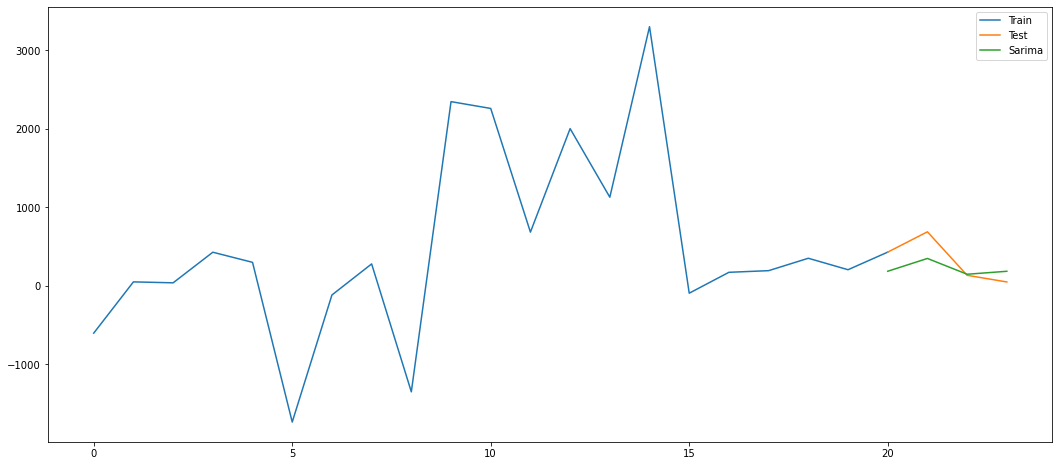

In [144]:
y_ma = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Profit, order=(1,0, 1),seasonal_order=(0,1,0,3)).fit()
y_ma['SARIMA'] = fit1.predict(start=19, end=23, dynamic=True)
plt.figure(figsize=(18,8))
plt.plot(train['Profit'], label='Train')
plt.plot(test['Profit'], label='Test')
plt.plot(y_ma['SARIMA'], label='Sarima')
plt.legend(loc='best')
plt.show()

In [142]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = math.sqrt(mean_squared_error(test.Profit, y_ma.SARIMA))
print(rms)

219.83153666458284


In [ ]:
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]